<a href="https://colab.research.google.com/github/AketzalliG/docs/blob/master/L05_Red_Neuronal_Densa_TF_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NEURONAL DENSA**
# Breast Cancer Wisconsin

**PASO 1.-** Importar las librerías


In [15]:
# Paquetería básica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades básicas de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



**PASO 2.-** Descargar el archivo y cargar los datos

In [16]:
!wget 'https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/BreastCancerWisconsin.csv'

--2025-09-12 05:16:20--  https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/BreastCancerWisconsin.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/BreastCancerWisconsin.csv [following]
--2025-09-12 05:16:20--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/BreastCancerWisconsin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘BreastCancerWisconsin.csv.1’

BreastCancerWiscons 100%[===================>] 122.2

In [17]:
dataset = pd.read_csv('BreastCancerWisconsin.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**PASO 3.-** Limpieza de datos y codificación

In [18]:
dataset = dataset.drop(columns=['id', 'Unnamed: 32'])

dataset['diagnosis'] = dataset['diagnosis'].replace({'M': 1, 'B': 0})

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

/tmp/ipython-input-1923548005.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diagnosis'] = dataset['diagnosis'].replace({'M': 1, 'B': 0})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**PASO 4.-** Elegir las variables de entrada y salida

In [19]:
# La variable de salida (y) es la variable de interés, que es 'diagnosis'
y = dataset[['diagnosis']]

# Las variables de entrada (x) son todas las demás columnas
x = dataset.drop(columns=['diagnosis'])

**PASO 5.-** Normalizar y particionar el conjunto de datos

In [20]:
# Normalización de los datos de entrada
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Partición del conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**PASO 6.-** Diseñar una red neuronal

In [21]:
# Importar las librerías necesarias
from keras import backend as KerasTensor

# Diseñar una red neuronal
def build_model():
  model = keras.Sequential()
  # Capa de entrada y primera capa oculta
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  # Capa de dropout
  model.add(keras.layers.Dropout(0.2))
  # Segunda capa oculta
  model.add(keras.layers.Dense(32, activation='relu'))
  # Capa de salida
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Compilar el modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
                )
  return model

# Construir y mostrar un resumen del modelo
model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

**PASO 7.-** Entrenar la red neuronal y dibujar las graficas de evolucion de entrenamiento

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5746 - loss: 0.6574 - val_accuracy: 0.9386 - val_loss: 0.3367
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.3371 - val_accuracy: 0.9737 - val_loss: 0.1952
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.2139 - val_accuracy: 0.9649 - val_loss: 0.1300
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9601 - loss: 0.1525 - val_accuracy: 0.9649 - val_loss: 0.0964
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9545 - loss: 0.1349 - val_accuracy: 0.9825 - val_loss: 0.0805
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9602 - loss: 0.1030 - val_accuracy: 0.9737 - val_loss: 0.0707
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9847 - loss: 0.0781 - val_accuracy: 0.9737 - val_loss: 0.0648
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9706 - loss: 0.0841 - val_accuracy: 0.9825 - 

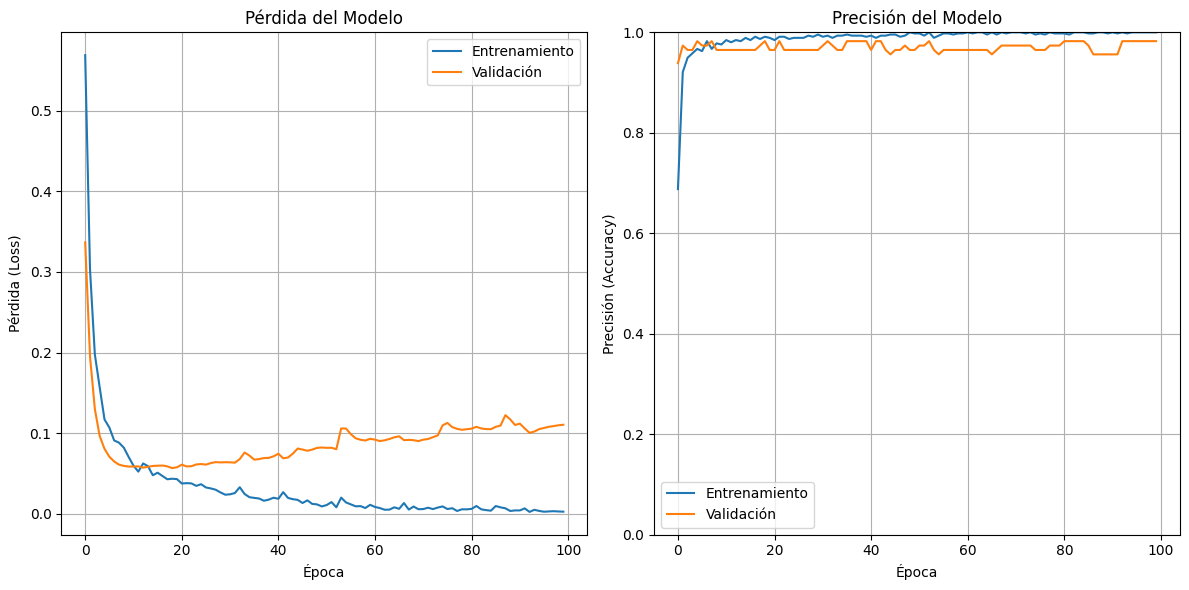

In [22]:
# Entrenar el modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    verbose=1
                    )

# Dibujar las curvas de aprendizaje
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(12, 6))

  # Gráfico de la pérdida (Loss)
  plt.subplot(1, 2, 1)
  plt.title('Pérdida del Modelo')
  plt.xlabel('Época')
  plt.ylabel('Pérdida (Loss)')
  plt.plot(hist['epoch'], hist['loss'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'], label='Validación')
  plt.legend()
  plt.grid(True)

  # Gráfico de la precisión ( Accuracy)
  plt.subplot(1, 2, 2)
  plt.title('Precisión del Modelo')
  plt.xlabel('Época')
  plt.ylabel('Precisión (Accuracy)')
  plt.plot(hist['epoch'], hist['accuracy'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Validación')
  plt.legend()
  plt.ylim([0, 1])
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_history(history)

**PASO 8.-** Implementación de Early Stopping como regulador

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7362 - loss: 0.5880 - val_accuracy: 0.9737 - val_loss: 0.3203
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9047 - loss: 0.3324 - val_accuracy: 0.9737 - val_loss: 0.1839
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9269 - loss: 0.2243 - val_accuracy: 0.9561 - val_loss: 0.1252
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9503 - loss: 0.1560 - val_accuracy: 0.9561 - val_loss: 0.1000
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9636 - loss: 0.1326 - val_accuracy: 0.9649 - val_loss: 0.0876
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9727 - loss: 0.1075 - val_accuracy: 0.9649 - val_loss: 0.0815
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9680 - loss: 0.1079 - val_accuracy: 0.9649 - val_loss: 0.0747
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9714 - loss: 0.0763 - val_accuracy: 0.9649 - val

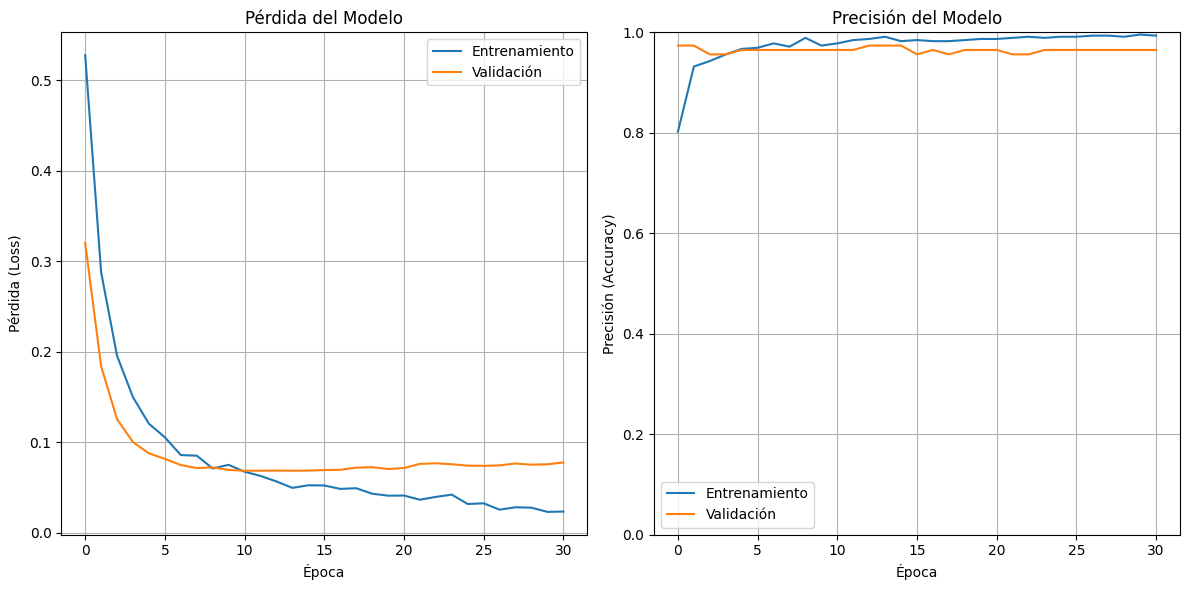

In [23]:
# Crear la instancia de EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=20,
                                   verbose=1,
                                   restore_best_weights=True
                                   )

# Construir el modelo optimizado
model_optimized = build_model()

# Entrenar el modelo optimizado
history_opt = model_optimized.fit(x_train,
                                  y_train,
                                  epochs=1000,
                                  batch_size=32,
                                  validation_data=(x_test, y_test),
                                  callbacks=[es],
                                  verbose=1
                                  )

# Dibujar las curvas de aprendizaje
plot_history(history_opt)

**PASO 9.-** Cálculo de Métricas

In [24]:
# Importar las librerías necesarias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = model_optimized.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Extraer las etiquetas verdaderas del conjunto de prueba
y_true = np.asanyarray(y_test)

# Calcular la Matriz de Confusión
cm = confusion_matrix(y_true, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

# Calcular y mostrar las métricas de desempeño
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"\nPrecisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1-Score): {f1:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Matriz de Confusión:
[[69  2]
 [ 2 41]]

Precisión (Accuracy): 0.9649
Precisión (Precision): 0.9535
Sensibilidad (Recall): 0.9535
Puntaje F1 (F1-Score): 0.9535
